<a href="https://colab.research.google.com/github/aashuprakash/ABIN/blob/main/abin_fc_demo_gene_expression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
np.random.seed(0)
from tensorflow.random import set_seed
set_seed(0)

In [ ]:
import pandas as pd
from tensorflow import keras
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from tensorflow.keras import layers
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import clone_model
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import accuracy_score

#### load label

In [ ]:
actual_df = pd.read_csv('actual.csv')
actual_df.head()

,patient,cancer
0,1,ALL
1,2,ALL
2,3,ALL
3,4,ALL
4,5,ALL


In [ ]:
actual_df.shape

(72, 2)

In [ ]:
actual_df['cancer'].value_counts()

ALL    47
AML    25
Name: cancer, dtype: int64

##### Encode label to numeric.

In [ ]:
y = actual_df.replace({'ALL':0, 'AML':1})
y = y.set_index('patient')
labels = ['ALL', 'AML']

##### Loading training and testing datasets.

In [ ]:
train_df = pd.read_csv('data_set_ALL_AML_train.csv')
test_df = pd.read_csv('data_set_ALL_AML_independent.csv')

In [ ]:
train_df

,Gene Description,Gene Accession Number,1,call,2,call.1,3,call.2,4,call.3,...,29,call.33,30,call.34,31,call.35,32,call.36,33,call.37
0,AFFX-BioB-5_at (endogenous control),AFFX-BioB-5_at,-214,A,-139,A,-76,A,-135,A,...,15,A,-318,A,-32,A,-124,A,-135,A
1,AFFX-BioB-M_at (endogenous control),AFFX-BioB-M_at,-153,A,-73,A,-49,A,-114,A,...,-114,A,-192,A,-49,A,-79,A,-186,A
2,AFFX-BioB-3_at (endogenous control),AFFX-BioB-3_at,-58,A,-1,A,-307,A,265,A,...,2,A,-95,A,49,A,-37,A,-70,A
3,AFFX-BioC-5_at (endogenous control),AFFX-BioC-5_at,88,A,283,A,309,A,12,A,...,193,A,312,A,230,P,330,A,337,A
4,AFFX-BioC-3_at (endogenous control),AFFX-BioC-3_at,-295,A,-264,A,-376,A,-419,A,...,-51,A,-139,A,-367,A,-188,A,-407,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7124,PTGER3 Prostaglandin E receptor 3 (subtype EP3...,X83863_at,793,A,782,A,1138,A,627,A,...,279,A,737,A,588,A,1170,A,2315,A
7125,HMG2 High-mobility group (nonhistone chromosom...,Z17240_at,329,A,295,A,777,P,170,A,...,51,A,227,A,361,A,284,A,250,A
7126,RB1 Retinoblastoma 1 (including osteosarcoma),L49218_f_at,36,A,11,A,41,A,-50,A,...,6,A,-9,A,-26,A,39,A,-12,A
7127,GB DEF = Glycophorin Sta (type A) exons 3 and ...,M71243_f_at,191,A,76,A,228,A,126,A,...,2484,P,371,A,133,A,298,A,790,P


In [ ]:
test_df

,Gene Description,Gene Accession Number,39,call,40,call.1,42,call.2,47,call.3,...,65,call.29,66,call.30,63,call.31,64,call.32,62,call.33
0,AFFX-BioB-5_at (endogenous control),AFFX-BioB-5_at,-342,A,-87,A,22,A,-243,A,...,-62,A,-58,A,-161,A,-48,A,-176,A
1,AFFX-BioB-M_at (endogenous control),AFFX-BioB-M_at,-200,A,-248,A,-153,A,-218,A,...,-198,A,-217,A,-215,A,-531,A,-284,A
2,AFFX-BioB-3_at (endogenous control),AFFX-BioB-3_at,41,A,262,A,17,A,-163,A,...,-5,A,63,A,-46,A,-124,A,-81,A
3,AFFX-BioC-5_at (endogenous control),AFFX-BioC-5_at,328,A,295,A,276,A,182,A,...,141,A,95,A,146,A,431,A,9,A
4,AFFX-BioC-3_at (endogenous control),AFFX-BioC-3_at,-224,A,-226,A,-211,A,-289,A,...,-256,A,-191,A,-172,A,-496,A,-294,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7124,PTGER3 Prostaglandin E receptor 3 (subtype EP3...,X83863_at,1074,A,67,A,893,P,722,A,...,707,A,423,A,809,A,466,A,551,A
7125,HMG2 High-mobility group (nonhistone chromosom...,Z17240_at,475,A,263,A,297,A,170,A,...,354,A,41,A,445,A,349,A,194,A
7126,RB1 Retinoblastoma 1 (including osteosarcoma),L49218_f_at,48,A,-33,A,6,A,0,A,...,-22,A,0,A,-2,A,0,A,20,A
7127,GB DEF = Glycophorin Sta (type A) exons 3 and ...,M71243_f_at,168,A,-33,A,1971,P,510,P,...,260,A,1777,P,210,A,284,A,379,A


In [ ]:
print("Shape of Training Data: ", train_df.shape)
print("Shape of Testing Data: ", test_df.shape)

Shape of Training Data:  (7129, 78)
Shape of Testing Data:  (7129, 70)


The 7129 gene descriptions are provided as the rows and the values for each patient as the columns. This will clearly require some tidying up.

We can remove "call" columns from training and testing dataframes.

In [ ]:
train_to_keep=[col for col in train_df.columns if "call" not in col]
test_to_keep=[col for col in test_df.columns if "call" not in col]

X_train = train_df[train_to_keep]
X_test = test_df[test_to_keep]

Now we can simply transpose both training and testing dataframes so that genes become columns(features) and patients become rows.

In [ ]:
X_train = X_train.T
X_test = X_test.T

In [ ]:
X_train.head()

,0,1,2,3,4,5,6,7,8,9,...,7119,7120,7121,7122,7123,7124,7125,7126,7127,7128
Gene Description,AFFX-BioB-5_at (endogenous control),AFFX-BioB-M_at (endogenous control),AFFX-BioB-3_at (endogenous control),AFFX-BioC-5_at (endogenous control),AFFX-BioC-3_at (endogenous control),AFFX-BioDn-5_at (endogenous control),AFFX-BioDn-3_at (endogenous control),AFFX-CreX-5_at (endogenous control),AFFX-CreX-3_at (endogenous control),AFFX-BioB-5_st (endogenous control),...,Transcription factor Stat5b (stat5b) mRNA,Breast epithelial antigen BA46 mRNA,GB DEF = Calcium/calmodulin-dependent protein ...,TUBULIN ALPHA-4 CHAIN,CYP4B1 Cytochrome P450; subfamily IVB; polypep...,PTGER3 Prostaglandin E receptor 3 (subtype EP3...,HMG2 High-mobility group (nonhistone chromosom...,RB1 Retinoblastoma 1 (including osteosarcoma),GB DEF = Glycophorin Sta (type A) exons 3 and ...,GB DEF = mRNA (clone 1A7)
Gene Accession Number,AFFX-BioB-5_at,AFFX-BioB-M_at,AFFX-BioB-3_at,AFFX-BioC-5_at,AFFX-BioC-3_at,AFFX-BioDn-5_at,AFFX-BioDn-3_at,AFFX-CreX-5_at,AFFX-CreX-3_at,AFFX-BioB-5_st,...,U48730_at,U58516_at,U73738_at,X06956_at,X16699_at,X83863_at,Z17240_at,L49218_f_at,M71243_f_at,Z78285_f_at
1,-214,-153,-58,88,-295,-558,199,-176,252,206,...,185,511,-125,389,-37,793,329,36,191,-37
2,-139,-73,-1,283,-264,-400,-330,-168,101,74,...,169,837,-36,442,-17,782,295,11,76,-14
3,-76,-49,-307,309,-376,-650,33,-367,206,-215,...,315,1199,33,168,52,1138,777,41,228,-41


The first 2 rows are duplicated so we can remove 'Gene Description' and set 'Gene Accession Number' as the column headers.

In [ ]:
X_train.columns = X_train.iloc[1]
X_test.columns = X_test.iloc[1]

In [ ]:
X_train.head()

Gene Accession Number,AFFX-BioB-5_at,AFFX-BioB-M_at,AFFX-BioB-3_at,AFFX-BioC-5_at,AFFX-BioC-3_at,AFFX-BioDn-5_at,AFFX-BioDn-3_at,AFFX-CreX-5_at,AFFX-CreX-3_at,AFFX-BioB-5_st,...,U48730_at,U58516_at,U73738_at,X06956_at,X16699_at,X83863_at,Z17240_at,L49218_f_at,M71243_f_at,Z78285_f_at
Gene Description,AFFX-BioB-5_at (endogenous control),AFFX-BioB-M_at (endogenous control),AFFX-BioB-3_at (endogenous control),AFFX-BioC-5_at (endogenous control),AFFX-BioC-3_at (endogenous control),AFFX-BioDn-5_at (endogenous control),AFFX-BioDn-3_at (endogenous control),AFFX-CreX-5_at (endogenous control),AFFX-CreX-3_at (endogenous control),AFFX-BioB-5_st (endogenous control),...,Transcription factor Stat5b (stat5b) mRNA,Breast epithelial antigen BA46 mRNA,GB DEF = Calcium/calmodulin-dependent protein ...,TUBULIN ALPHA-4 CHAIN,CYP4B1 Cytochrome P450; subfamily IVB; polypep...,PTGER3 Prostaglandin E receptor 3 (subtype EP3...,HMG2 High-mobility group (nonhistone chromosom...,RB1 Retinoblastoma 1 (including osteosarcoma),GB DEF = Glycophorin Sta (type A) exons 3 and ...,GB DEF = mRNA (clone 1A7)
Gene Accession Number,AFFX-BioB-5_at,AFFX-BioB-M_at,AFFX-BioB-3_at,AFFX-BioC-5_at,AFFX-BioC-3_at,AFFX-BioDn-5_at,AFFX-BioDn-3_at,AFFX-CreX-5_at,AFFX-CreX-3_at,AFFX-BioB-5_st,...,U48730_at,U58516_at,U73738_at,X06956_at,X16699_at,X83863_at,Z17240_at,L49218_f_at,M71243_f_at,Z78285_f_at
1,-214,-153,-58,88,-295,-558,199,-176,252,206,...,185,511,-125,389,-37,793,329,36,191,-37
2,-139,-73,-1,283,-264,-400,-330,-168,101,74,...,169,837,-36,442,-17,782,295,11,76,-14
3,-76,-49,-307,309,-376,-650,33,-367,206,-215,...,315,1199,33,168,52,1138,777,41,228,-41


In [ ]:
X_train = X_train.drop(['Gene Description', 'Gene Accession Number'])
X_test = X_test.drop(['Gene Description', 'Gene Accession Number'])

In [ ]:
X_train.head()

Gene Accession Number,AFFX-BioB-5_at,AFFX-BioB-M_at,AFFX-BioB-3_at,AFFX-BioC-5_at,AFFX-BioC-3_at,AFFX-BioDn-5_at,AFFX-BioDn-3_at,AFFX-CreX-5_at,AFFX-CreX-3_at,AFFX-BioB-5_st,...,U48730_at,U58516_at,U73738_at,X06956_at,X16699_at,X83863_at,Z17240_at,L49218_f_at,M71243_f_at,Z78285_f_at
1,-214,-153,-58,88,-295,-558,199,-176,252,206,...,185,511,-125,389,-37,793,329,36,191,-37
2,-139,-73,-1,283,-264,-400,-330,-168,101,74,...,169,837,-36,442,-17,782,295,11,76,-14
3,-76,-49,-307,309,-376,-650,33,-367,206,-215,...,315,1199,33,168,52,1138,777,41,228,-41
4,-135,-114,265,12,-419,-585,158,-253,49,31,...,240,835,218,174,-110,627,170,-50,126,-91
5,-106,-125,-76,168,-230,-284,4,-122,70,252,...,156,649,57,504,-26,250,314,14,56,-25


Neither the training and testing row indexes are not in numeric order, so it's important that we reorder these, so that the labels will line up with the corresponding data.

In [ ]:
X_train.index = X_train.index.astype(int)
X_train.sort_index(inplace=True)

X_test.index = X_test.index.astype(int)
X_test.sort_index(inplace=True)

In [ ]:
print("Shape of Training data:\t", X_train.shape)
print("Shape of Testing Data:\t", X_test.shape)

Shape of Training data:	 (38, 7129)
Shape of Testing Data:	 (34, 7129)


Now let's split the target labels into training and testing targets.

In [ ]:
y_train = y['cancer'][:38]
y_test = y['cancer'][38:]

In [ ]:
from sklearn.model_selection import train_test_split
X_val, X_test_held_out, y_val, y_test_held_out = train_test_split(X_test, y_test, test_size=0.5, random_state=3407)

In [ ]:
X_val.shape, X_test_held_out.shape

((17, 7129), (17, 7129))

## Standardizing Features

Note that the test set must use identical scaling to the training set.

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [ ]:
y_train.value_counts()

0    27
1    11
Name: cancer, dtype: int64

Just right model

In [ ]:
from sklearn.utils import class_weight

NN_model = keras.Sequential([
    layers.Dense(64, activation='relu',  input_shape=X_train_scaled[1].shape),
    layers.Dropout(0.5),
    layers.Dense(32, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])
# Calculate class weights
# class_weights = class_weight.compute_class_weight('balanced', np.unique(y_train), y_train)
class_weights = {0: 1, 1: 2.45}
NN_model.compile(
    loss='binary_crossentropy',
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    metrics=['accuracy']
)

history = NN_model.fit(
    X_train_scaled, y_train,
    validation_data=(X_val_scaled, y_val), class_weight=class_weights,
    batch_size = 64,
    epochs = 100
)

# NN_model_right =  clone_model(NN_model)
# NN_model_right.compile(optimizer=NN_model.optimizer,
#                      loss=NN_model.loss,
#                      metrics=NN_model.metrics)

Epoch 1/100
1/1 [==============================] - 1s 618ms/step - loss: 1.2134 - accuracy: 0.5263 - val_loss: 1.2189 - val_accuracy: 0.5294
Epoch 2/100
1/1 [==============================] - 0s 112ms/step - loss: 1.2530 - accuracy: 0.6579 - val_loss: 1.0723 - val_accuracy: 0.6471
Epoch 3/100
1/1 [==============================] - 0s 105ms/step - loss: 0.7402 - accuracy: 0.7105 - val_loss: 0.9604 - val_accuracy: 0.6471
Epoch 4/100
1/1 [==============================] - 0s 94ms/step - loss: 0.5907 - accuracy: 0.8421 - val_loss: 0.8770 - val_accuracy: 0.6471
Epoch 5/100
1/1 [==============================] - 0s 66ms/step - loss: 0.6070 - accuracy: 0.8684 - val_loss: 0.8446 - val_accuracy: 0.7059
Epoch 6/100
1/1 [==============================] - 0s 108ms/step - loss: 1.1857 - accuracy: 0.8158 - val_loss: 0.8585 - val_accuracy: 0.7059
Epoch 7/100
1/1 [==============================] - 0s 105ms/step - loss: 0.5609 - accuracy: 0.8421 - val_loss: 0.8233 - val_accuracy: 0.7059
Epoch 8/100
1/1

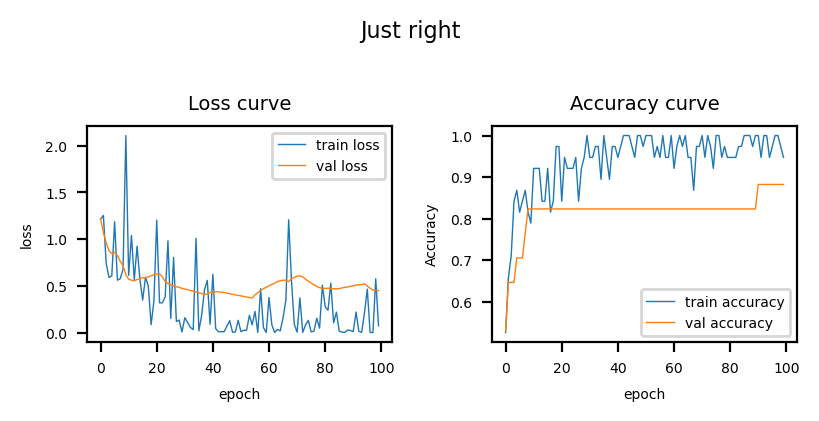

In [ ]:
fig, ax= plt.subplots(1, 2, dpi =200, figsize = (4.2,2.1))
ax[0].plot(history.history['loss'], label = "train loss", lw = 0.5)
ax[0].plot(history.history['val_loss'], label = "val loss", lw = 0.5)
ax[1].plot(history.history['accuracy'], label = "train accuracy", lw = 0.5)
ax[1].plot(history.history['val_accuracy'], label = "val accuracy", lw = 0.5)
ax[0].legend(fontsize=5)
ax[1].legend(fontsize=5)
ax[0].set_title("Loss curve", fontsize=7)
ax[1].set_title("Accuracy curve", fontsize=7)
ax[0].set_xlabel("epoch", fontsize=5)
ax[1].set_xlabel("epoch", fontsize=5)
ax[0].set_ylabel("loss", fontsize=5)
ax[1].set_ylabel("Accuracy", fontsize=5)
ax[0].tick_params(axis='both', which='major', labelsize=5)
ax[1].tick_params(axis='both', which='major', labelsize=5)
plt.suptitle("Just right", fontsize=8)
plt.tight_layout()

Underfit model

In [ ]:
NN_model = keras.Sequential([
    layers.Dense(8, activation='relu',  kernel_regularizer= keras.regularizers.l2(0.1),  input_shape=X_train_scaled[1].shape),
    layers.Dropout(0.9),
    layers.Dense(4, activation='relu'),
    layers.Dropout(0.9),
    layers.Dense(1, activation='sigmoid')
])

NN_model.compile(
    loss='binary_crossentropy',
    optimizer=keras.optimizers.Adam(learning_rate=0.0001),
    metrics=['accuracy']
)

history = NN_model.fit(
    X_train_scaled, y_train,
    validation_data=(X_val_scaled, y_val),
    batch_size = 64,
    epochs = 100
)

Epoch 1/100
1/1 [==============================] - 1s 585ms/step - loss: 3.4584 - accuracy: 0.6316 - val_loss: 2.9120 - val_accuracy: 0.4706
Epoch 2/100
1/1 [==============================] - 0s 114ms/step - loss: 2.2570 - accuracy: 0.7368 - val_loss: 2.8831 - val_accuracy: 0.4706
Epoch 3/100
1/1 [==============================] - 0s 137ms/step - loss: 2.2663 - accuracy: 0.7105 - val_loss: 2.8578 - val_accuracy: 0.4706
Epoch 4/100
1/1 [==============================] - 0s 123ms/step - loss: 3.3423 - accuracy: 0.6842 - val_loss: 2.8327 - val_accuracy: 0.4706
Epoch 5/100
1/1 [==============================] - 0s 90ms/step - loss: 9.4077 - accuracy: 0.6579 - val_loss: 2.7961 - val_accuracy: 0.4706
Epoch 6/100
1/1 [==============================] - 0s 99ms/step - loss: 2.2636 - accuracy: 0.7105 - val_loss: 2.7635 - val_accuracy: 0.4706
Epoch 7/100
1/1 [==============================] - 0s 108ms/step - loss: 2.2093 - accuracy: 0.7368 - val_loss: 2.7351 - val_accuracy: 0.4706
Epoch 8/100
1/1

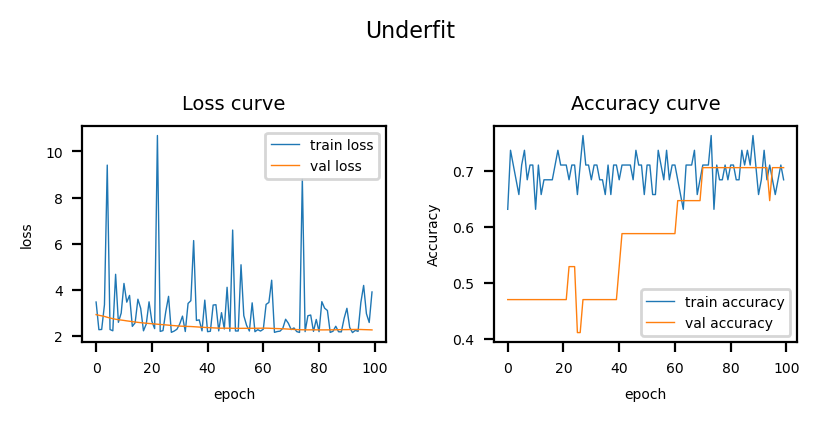

In [ ]:
fig, ax= plt.subplots(1, 2, dpi =200, figsize = (4.2,2.1))
ax[0].plot(history.history['loss'], label = "train loss", lw = 0.5)
ax[0].plot(history.history['val_loss'], label = "val loss", lw = 0.5)
ax[1].plot(history.history['accuracy'], label = "train accuracy", lw = 0.5)
ax[1].plot(history.history['val_accuracy'], label = "val accuracy", lw = 0.5)
ax[0].legend(fontsize=5)
ax[1].legend(fontsize=5)
ax[0].set_title("Loss curve", fontsize=7)
ax[1].set_title("Accuracy curve", fontsize=7)
ax[0].set_xlabel("epoch", fontsize=5)
ax[1].set_xlabel("epoch", fontsize=5)
ax[0].set_ylabel("loss", fontsize=5)
ax[1].set_ylabel("Accuracy", fontsize=5)
ax[0].tick_params(axis='both', which='major', labelsize=5)
ax[1].tick_params(axis='both', which='major', labelsize=5)
plt.suptitle("Underfit", fontsize=8)
plt.tight_layout()

Overfit model

In [ ]:
NN_model = keras.Sequential([
    layers.Dense(256, activation='relu',  input_shape=X_train_scaled[1].shape),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

NN_model.compile(
    loss='binary_crossentropy',
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    metrics=['accuracy']
)

history = NN_model.fit(
    X_train_scaled, y_train,
    validation_data=(X_val_scaled, y_val),
    batch_size = 64,
    epochs = 100
)

Epoch 1/100
1/1 [==============================] - 1s 597ms/step - loss: 1.0984 - accuracy: 0.2895 - val_loss: 0.5071 - val_accuracy: 0.7647
Epoch 2/100
1/1 [==============================] - 0s 122ms/step - loss: 0.0613 - accuracy: 1.0000 - val_loss: 0.3793 - val_accuracy: 0.8235
Epoch 3/100
1/1 [==============================] - 0s 103ms/step - loss: 0.0060 - accuracy: 1.0000 - val_loss: 0.3589 - val_accuracy: 0.8235
Epoch 4/100
1/1 [==============================] - 0s 100ms/step - loss: 9.2036e-04 - accuracy: 1.0000 - val_loss: 0.4339 - val_accuracy: 0.8235
Epoch 5/100
1/1 [==============================] - 0s 122ms/step - loss: 1.9063e-04 - accuracy: 1.0000 - val_loss: 0.5763 - val_accuracy: 0.8235
Epoch 6/100
1/1 [==============================] - 0s 120ms/step - loss: 6.0224e-05 - accuracy: 1.0000 - val_loss: 0.7647 - val_accuracy: 0.8235
Epoch 7/100
1/1 [==============================] - 0s 122ms/step - loss: 3.7008e-05 - accuracy: 1.0000 - val_loss: 0.9807 - val_accuracy: 0.76

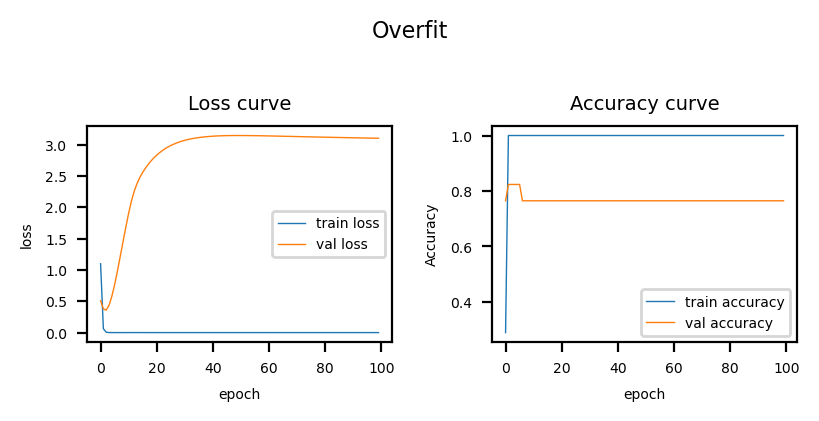

In [ ]:
fig, ax= plt.subplots(1, 2, dpi =200, figsize = (4.2,2.1))
ax[0].plot(history.history['loss'], label = "train loss", lw = 0.5)
ax[0].plot(history.history['val_loss'], label = "val loss", lw = 0.5)
ax[1].plot(history.history['accuracy'], label = "train accuracy", lw = 0.5)
ax[1].plot(history.history['val_accuracy'], label = "val accuracy", lw = 0.5)
ax[0].legend(fontsize=5)
ax[1].legend(fontsize=5)
ax[0].set_title("Loss curve", fontsize=7)
ax[1].set_title("Accuracy curve", fontsize=7)
ax[0].set_xlabel("epoch", fontsize=5)
ax[1].set_xlabel("epoch", fontsize=5)
ax[0].set_ylabel("loss", fontsize=5)
ax[1].set_ylabel("Accuracy", fontsize=5)
ax[0].tick_params(axis='both', which='major', labelsize=5)
ax[1].tick_params(axis='both', which='major', labelsize=5)
plt.suptitle("Overfit", fontsize=8)
plt.tight_layout()

##### check result on test data

In [ ]:
pred = NN_model.predict(np.array(tf.convert_to_tensor(X_test, dtype=tf.float32)))
print('Neural Network accuracy: ', round(accuracy_score(y_test, np.round(pred)), 3))

2/2 [==============================] - 0s 30ms/step
Neural Network accuracy:  0.735


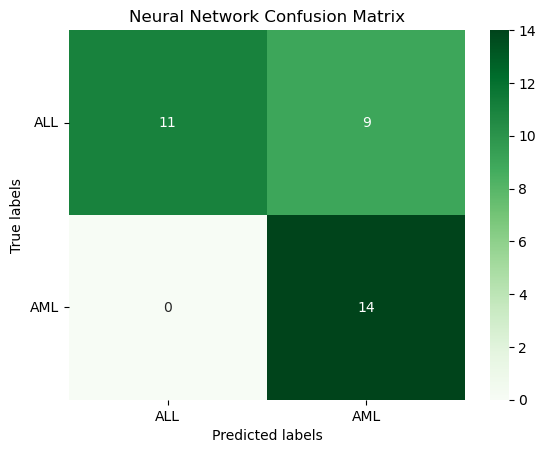

In [ ]:
cm_nn = confusion_matrix(y_test, np.round(pred))
ax = plt.subplot()
sns.heatmap(cm_nn, annot=True, ax = ax, fmt='g', cmap='Greens')
# Labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Neural Network Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels, rotation=360);